In [1]:
import os
import pandas as pd
import numpy as np
import glob
from pathlib import Path
import cv2
import seaborn as sns
import json
import torch
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm as tqdm
import sklearn

In [2]:
sns.set_style('white')

In [3]:
%load_ext autoreload
%autoreload 2

In [5]:
sys.path.append('./detector/')
from DeepFakeDetector import DeepFakeDetector
sys.path.append('./util/')
from detectorDebugUtils import *

/home/joni/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [23]:
# test with a creative commons licensed deepfake video sample from youtube
# https://www.youtube.com/watch?v=MBWue1T_irk
test_video_path="../DeepFake/youtube_cc/Donald Trump  Mr Bean Deepfake.mp4"

In [24]:
deepfake_models_directory = './model_packages/deepfake_2020_03_09/'
third_party_models_directory = './pretrained_models'

deepFakeDetector = DeepFakeDetector(deepfake_models_directory=deepfake_models_directory,
                                    third_party_models_directory=third_party_models_directory,
                                    verbose=2)

cuda:0
Loaded video frame sampler.
Loaded face detectors.
Loaded pytorch facenet face embeddings model.
Loaded 2 small face classifier and 2 large face classifier models.
0 - Small face model: ./model_packages/deepfake_2020_03_09/small_face_classifier/2020_02_19-f3
1 - Small face model: ./model_packages/deepfake_2020_03_09/small_face_classifier/2020_02_21-f1
0 - Large face model: ./model_packages/deepfake_2020_03_09/large_face_classifier/2020_03_05-f4
1 - Large face model: ./model_packages/deepfake_2020_03_09/large_face_classifier/2020_03_07-f2
RecurrrentModelConfig: len_sequence 5, min_frame_index 10, max_frame_index 16
RecurrrentModelConfig: len_sequence 5, min_frame_index 10, max_frame_index 16
Loaded 2 face sequence classifier models.
Loaded 5 second level xgb classifier models, 5 logistic regression models and 0 LightGBM models
##################################################
DeepFakeDetector v.0.9.0
Sample 10 first frames and 10 spaced frames.
Number of max retries is 4
On erro

## Sample data

In [25]:
%%time

datasOfTrackedPersons = deepFakeDetector.GetFeatures(test_video_path,
                                                     return_data=True)

Sampling frame indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 38, 67, 96, 125, 154, 183, 212, 241, 270, 299]
VideoFrameSampler took 0.281 seconds
MTCNN facedetector took 0.548 seconds
Face detection postprocess took 0.000 seconds
CPU times: user 2.25 s, sys: 37.1 ms, total: 2.29 s
Wall time: 897 ms


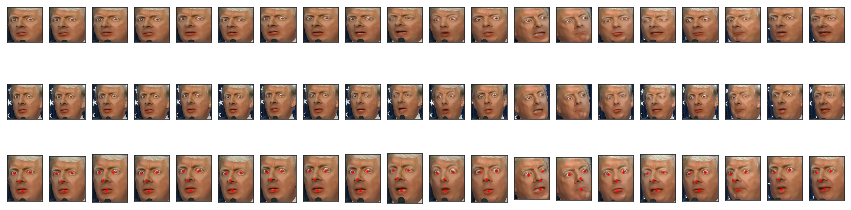

In [26]:
plotFaceSamples(datasOfTrackedPersons, n_frames=20)

# Predict

Sampling frame indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 38, 67, 96, 125, 154, 183, 212, 241, 270, 299]
VideoFrameSampler took 0.298 seconds
MTCNN facedetector took 0.545 seconds
Face detection postprocess took 0.000 seconds
Face classifier small preds: [0.934462 0.937616 0.981436 0.949183 0.966234 0.958369 0.978971 0.979771 0.983782 0.998019 0.957044 0.985562 0.999834
 0.998087 0.993393 0.999141 0.995194 0.996269 0.991989 0.995231]
Face classifier small preds: [0.966581 0.961841 0.967016 0.972696 0.966045 0.959928 0.96877  0.968139 0.965725 0.977922 0.974851 0.88795  0.966977
 0.964411 0.964236 0.964315 0.967868 0.972885 0.980745 0.975877]
Face classifier small preds: [0.991214 0.967448 0.991551 0.964723 0.986758 0.955523 0.984174 0.989274 0.994763 0.996074 0.944226 0.992458 0.999803
 0.998786 0.991444 0.998207 0.987112 0.993216 0.992616 0.99675 ]
Face classifier small preds: [0.944749 0.976856 0.98176  0.985522 0.985162 0.973514 0.986186 0.988751 0.984942 0.991375 0.981068 0.532943 0.9

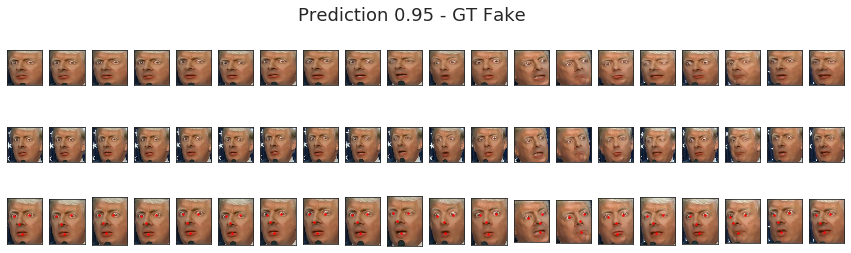

In [28]:
analyzePred(deepFakeDetector, test_video_path, real_label="Fake")